Each headline corresponds with a stock symbol (currently only tracking US markets - companies represented by the NASDAQ and DJIA) and a sentiment label. The sentiment labels are as follows:<br>

0 -> The stock went down by market close the day the article was published (negative)<br>

1 -> The stock went up by market close the day the article was published (positive)<br>

2 -> The stock stayed the same by market close the day the article was published (neutral)

**Goal :  create a Word2Vec model which can provide a market sentiment form input news feed provided by user**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
# show all rows & columns , not required here
# pd.pandas.set_option("display.max_rows",None)
# pd.pandas.set_option("display.max_columns",None)

In [5]:
#importing the dija & nasdaq dataframe
df_dija=pd.read_csv('../input/news-sentiment-analysis-for-stock-data-by-company/djia_news copy.csv/djia_news copy.csv',encoding = "ISO-8859-1")
df_nasdaq=pd.read_csv('../input/news-sentiment-analysis-for-stock-data-by-company/nasdaq.csv/nasdaq.csv',encoding = "ISO-8859-1")

FileNotFoundError: [Errno 2] No such file or directory: '../input/news-sentiment-analysis-for-stock-data-by-company/djia_news copy.csv/djia_news copy.csv'

In [162]:
#combine the dataframes together
df=pd.concat([df_dija,df_nasdaq])

In Us stock market dija(Dow Jones Industrial Average) list 30 prominent companies and nasdaq(National Association of Securities Dealers Automated Quotations) refer to all company listed in NYSE(New York Stock Exchange) , Nasdaq is also the name of the Stck exchage.

Previously DIJA index was used for Industry heavy companies & NASDAQ was for tech,internet based companies but now that is not the case anymore


**Hypothesis : Combining both Nasdaq & The Dow will give holistic view of the market , so I've combined both of dija & nasdaq (whether training them separately will give better model or not that needs to be tested)**

In [163]:
df.head(5)

,Label,Ticker,Headline
0,0,MMM,Employer who stole nearly $3M in wages from 15...
1,1,MMM,Huge new Facebook data leak exposed intimate d...
2,0,MMM,A campaign has accelerated to turn a disused r...
3,1,MMM,Google launches global human trafficking helpl...
4,1,MMM,Over 3m Saudi Women Donât Have ID Cards; Sau...


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15562 entries, 0 to 13180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     15562 non-null  int64 
 1   Ticker    15562 non-null  object
 2   Headline  15562 non-null  object
dtypes: int64(1), object(2)
memory usage: 486.3+ KB


For visualizing the sentiment distribution I'm using dija because :
1. it's small in size , so we can observe any pattern easily
2. it contains the best performers of market, we can get an overview of economy & industry from this index

In [165]:
#counting cumulative frequency of labels : 1 - positive , 0 - negative , 2- neutral
df_dija.groupby(by='Ticker').count()

,Label,Headline
Ticker,,
AAAU,100,100
AAPL,100,100
ADME,100,100
AIQ,100,100
AMGN,12,12
AXP,80,80
BA,100,100
CAT,99,99
CCEP,100,100


Quite a large number of label valus , so we need answers for . 
1. Is there any duplicate headline ?
2. If there is duplicate,does market behave in a consistent manner when it encounters these headline ?

In [166]:
#separating unique & duplicate values , storing them in different dataframe
df_dija_dup=df_dija[df_dija.duplicated('Headline',keep=False)].sort_values('Headline')
df_dija_unique=df_dija[~df_dija.duplicated('Headline',keep=False)].sort_values('Headline')

In [167]:
# now counting number of sentiments(+ve,-ve and neutral) present for each & every stock of dija
df_dija_unique.groupby(by=['Ticker','Label']).count()

Headline
Ticker Label          
AAAU   0            94
       1             3
AAPL   0            51
       1            35
       2             2
...                ...
WBA    0            28
       1            20
WMT    0            52
       1            39
       2             3

[67 rows x 1 columns]

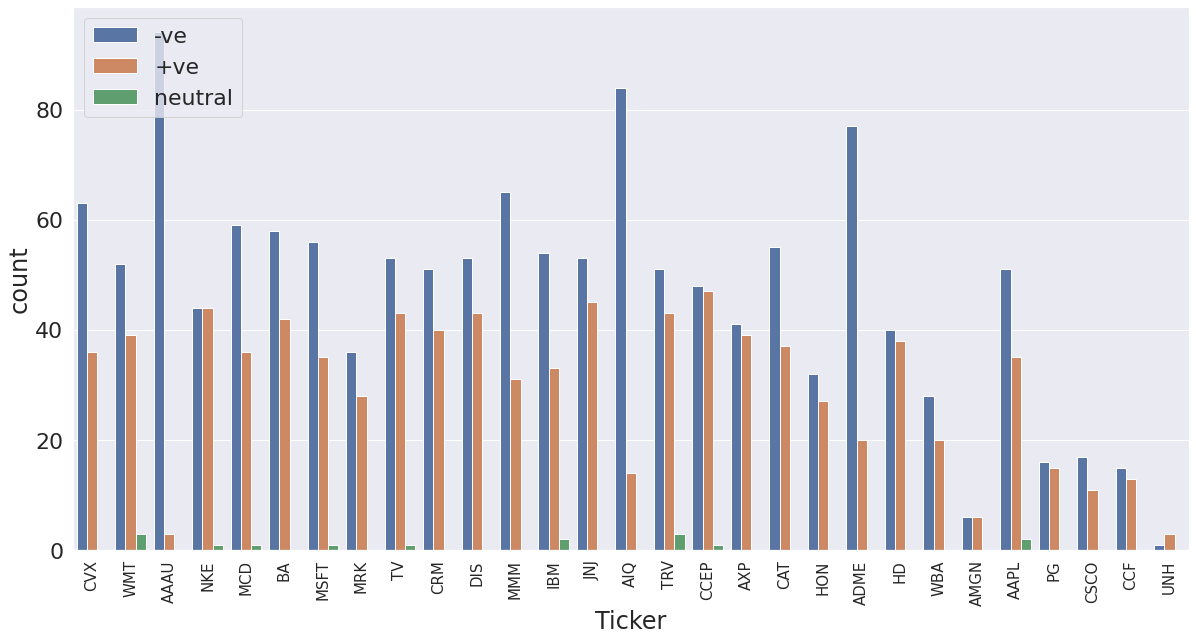

In [168]:
#plotting distribution of unique values
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.set(font_scale = 2)
plt.xticks(rotation=90,fontsize=15)
sns.countplot(x=df_dija_unique['Ticker'],hue=df_dija_unique['Label'])
ax.legend(['-ve','+ve','neutral'])
plt.show()

 Overall review
 -----------------------------------------------------------------------------------
**most of the stocks that showing predominantly -ve trend or bearish trend**<br>
**NKE,CCEP - very volatile i.e price fluctuating**<br>
**AAAU,AIQ,ADME - high -ve sentiment**<br>
**for rest of the stock - no high craze, but news is circulating & that is effecting buyer-seller sentiment (at a moderate rate)**

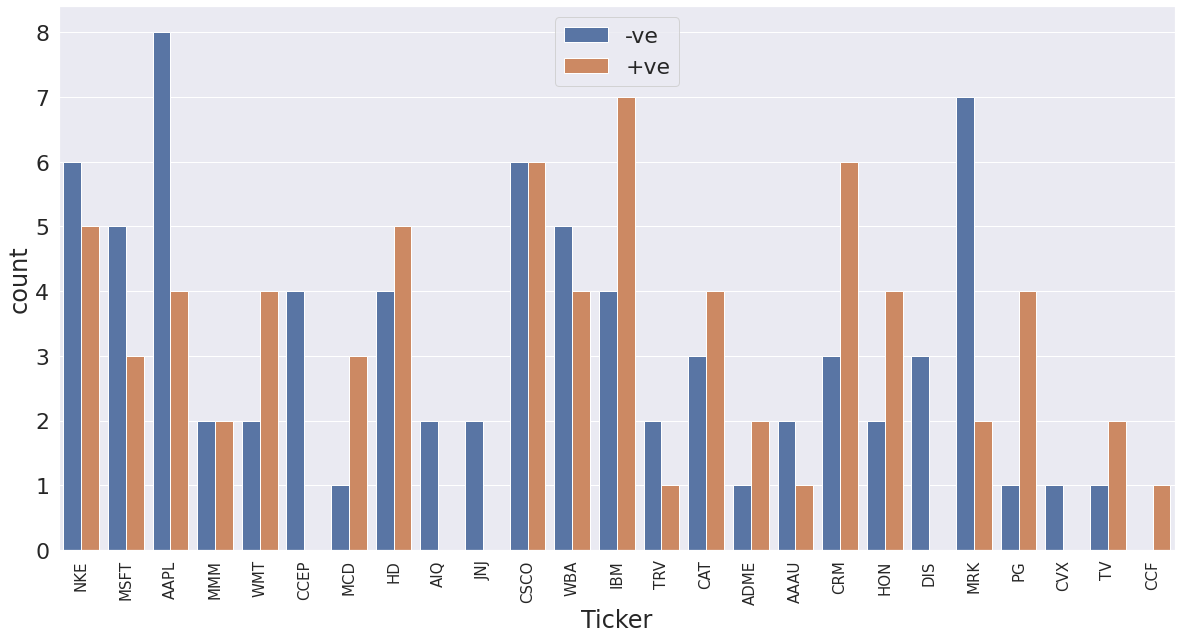

In [169]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.set(font_scale = 2)
plt.xticks(rotation=90,fontsize=15)
sns.countplot(x=df_dija_dup['Ticker'],hue=df_dija_dup['Label'])
ax.legend(['-ve','+ve'])
plt.show()

now this is interesting

what are the possible reasons of duplicate news/headline of the same stock?
1. different platform is taking news from same media house (similar sentiment)
2. diferent media house is trying to create dissimilar sentiment (price manipulation might be an intention , can say for sure) for the same stock

**Effect**:<br>
well market participants are showing bullish sentiment compared situations in previous case where participants got almost correct information (people are buying more when they are not sure about the market position)<br>

One thing to remember : This headlines were taken at different timestamp so same stock has behaved 
differently over the timespan<br>

Overal review
---------------
**market volatile , slightly bullish<br>
ANQ,JNJ showing -ve trend (exception)<br>
news circulation very limited i.e limited person has this news of somewhat sudden somewhat +ve trend/increase in volatility in market**

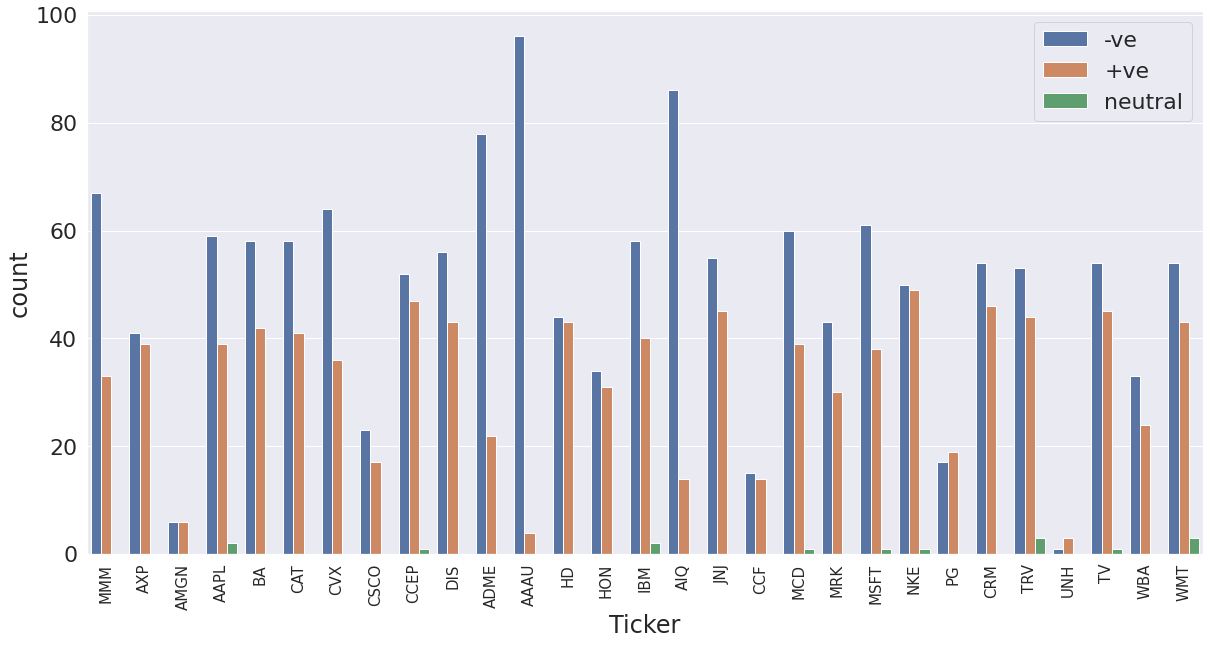

In [170]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.set(font_scale = 2)
plt.xticks(rotation=90,fontsize=15)
sns.countplot(x=df_dija['Ticker'],hue=df_dija['Label'])
ax.legend(['-ve','+ve','neutral'])
plt.show()

If someone is looking for volatility or scalping or intraday , these are the opportunities<br>
buy & sell both (scalping) - AXP,HD,HON,CCF,PG<br>
short sell(intraday) - AAAU,AIO,ADME<br>


In [171]:
#categorize each sentiments (+ve,-ve,neutral) for each stock
df=df.groupby(by=['Ticker','Label'])['Headline'].apply(' '.join).reset_index()

In [172]:
from wordcloud import WordCloud, STOPWORDS

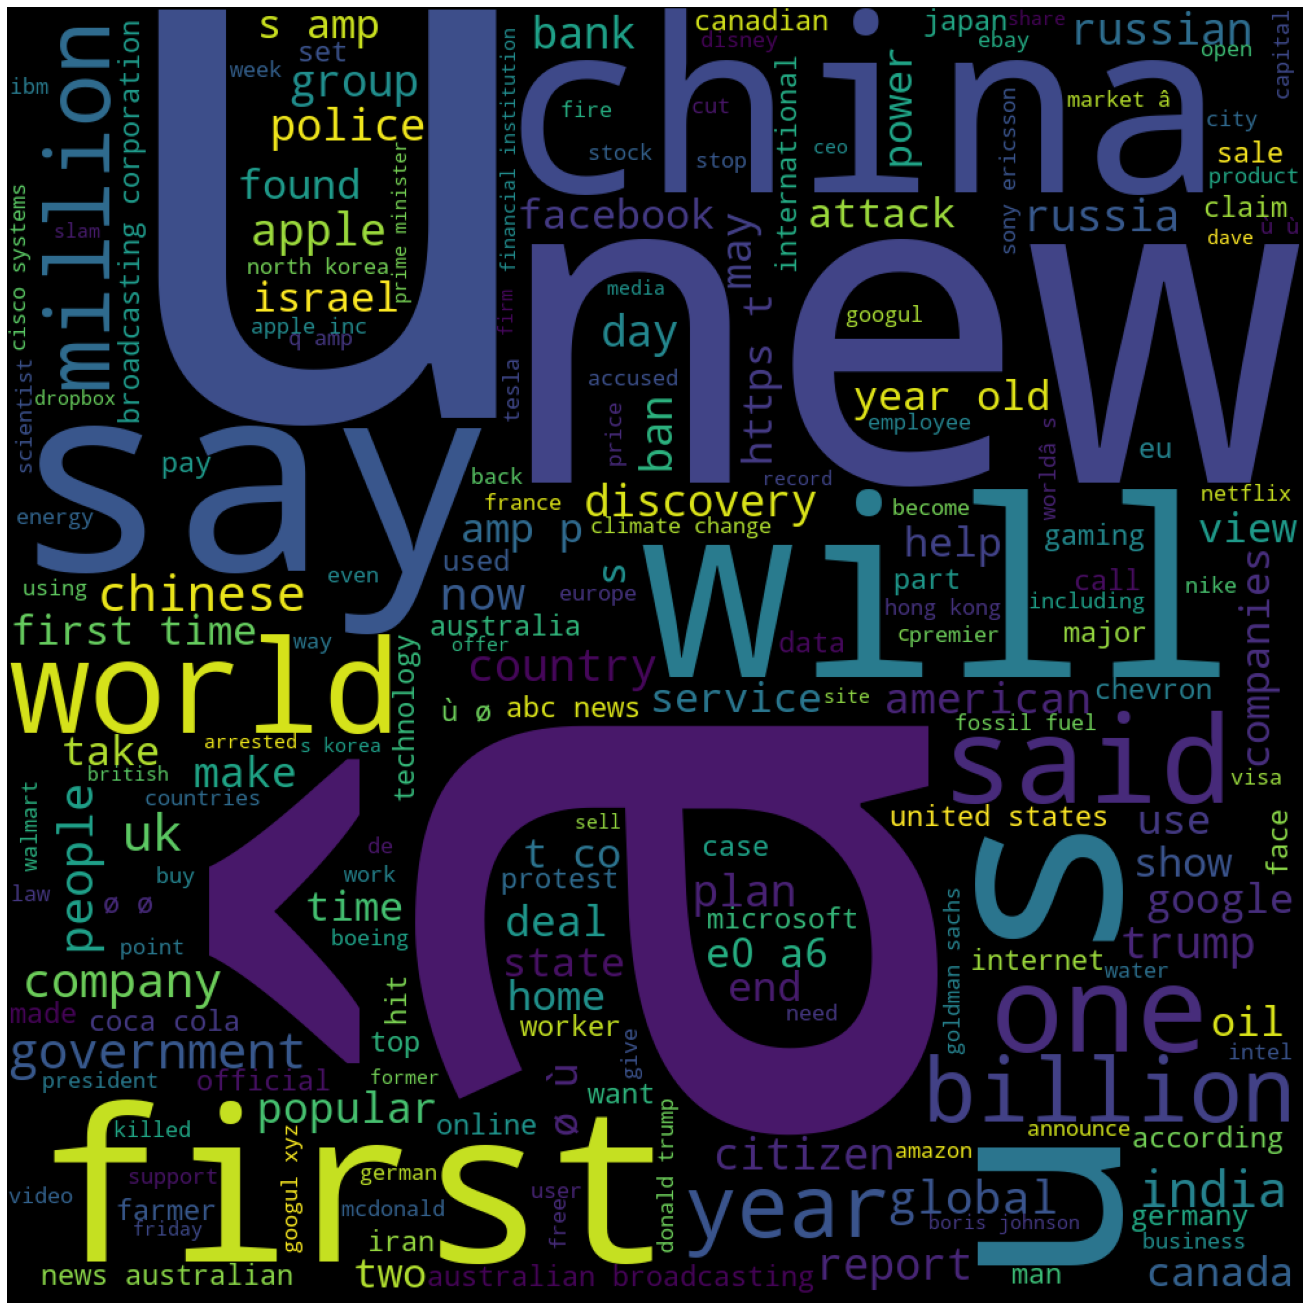

In [173]:
# let's check which words are causing havoc or creating opportunity
comment_words = ''
stopwords = set(STOPWORDS)

for val in df['Headline'].str.lower():
    tokens = val.split()
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 1000, height = 1000,background_color ='black',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)
 
                     
plt.figure(figsize = (18, 18), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [174]:
#combine all sentiments into 3 groups (+ve,-ve,neutral) based on headline
def combine_text(data):
    headline0=[] # list to store -ve healine
    headline1=[] # list to store +ve healine
    headline2=[] # list to store neutral healine
    for i in range(len(data)):
        label=data.iloc[i,1]
        headline=data.iloc[i,2].lower()
        # we compare the levels & store to corresponding list
        if label==0:
            headline0.append(''.join(str(x)for x in headline))
        elif label==1:
            headline1.append(''.join(str(x)for x in headline))
        elif label==2:
            headline2.append(''.join(str(x)for x in headline))
    
    # convert list to text & storing them inside another list so we can access it by index
    sentence_list=[]
    if len(headline0)>0:
        text0=(''.join(str(x)for x in headline0))
        sentence_list.append(text0)
    if len(headline1)>0:
        text1=(''.join(str(x)for x in headline1))
        sentence_list.append(text1)
    if len(headline2)>0:
        text2=(''.join(str(x)for x in headline2))
        sentence_list.append(text2)
    
    return sentence_list

In [175]:
whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [176]:
#perform text cleaning 
def tokenize_text(sentences):
    stop = set()
    for i in range(len(sentences)):
        # remove non-letter
        sentences[i] = ''.join(filter(whitelist.__contains__, sentences[i]))
        #splits the headline text into sentences
        sentences[i]=nltk.sent_tokenize(sentences[i])
        #remove article,verb,conjunction etc. & convert it to root form of the word
        sentences[i] = [nltk.word_tokenize(sentence) for sentence in sentences[i]]
        #remove stop words
        for j in range(len(sentences[i])):
            sentences[i][j] = [word for word in sentences[i][j] if word not in stopwords.words('english')]
    return sentences

**run below cell twice to make sure stopwords have been downloaded properly, otherwise it won't be able to find stopword & give error**

In [177]:
import nltk
nltk.download()
from nltk.corpus import stopwords

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  l


Packages:
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] comparative_sentences Comparative Sentence Dataset
  [ ] dolch............... Dolch Word List
  [ ] extended_omw........ Extended Open Multilingual WordNet
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [ ] mwa_ppdb............ The monolingual word aligner (Sultan et al.
                           2015) subset of the Paraphrase Database.
  [ ] nombank.1.0......... NomBank Corpus 1.0
  [ ] nonbreaking_prefixes Non-Breaking Prefixes (Moses Decoder)
  [ ] omw-1.4............. Open Multilingual Wordnet
  [ ] panlex_swadesh...... PanLex Swadesh Corpora
  [ ] pe08................ Cross-Framework and Cross-Domain Parser
                           Evaluation Shared Task
  [ ] perluniprops........ perluniprops: Index of Unicode Version 7.0.0
                           character properties in Perl
  [ ] verbnet3............ VerbNet Lexicon, Version 3.3
  [ ] wmt15_eval.....

Hit Enter to continue:  



Collections:
  [P] all-corpora......... All the corpora
  [P] all-nltk............ All packages available on nltk_data gh-pages
                           branch
  [P] all................. All packages
  [P] book................ Everything used in the NLTK Book
  [P] popular............. Popular packages
  [P] tests............... Packages for running tests
  [ ] third-party......... Third-party data packages

([*] marks installed packages; [P] marks partially installed collections)

Download which package (l=list; x=cancel)?


  Identifier>  l


Packages:
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] comparative_sentences Comparative Sentence Dataset
  [ ] dolch............... Dolch Word List
  [ ] extended_omw........ Extended Open Multilingual WordNet
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [ ] mwa_ppdb............ The monolingual word aligner (Sultan et al.
                           2015) subset of the Paraphrase Database.
  [ ] nombank.1.0......... NomBank Corpus 1.0
  [ ] nonbreaking_prefixes Non-Breaking Prefixes (Moses Decoder)
  [ ] omw-1.4............. Open Multilingual Wordnet
  [ ] panlex_swadesh...... PanLex Swadesh Corpora
  [ ] pe08................ Cross-Framework and Cross-Domain Parser
                           Evaluation Shared Task
  [ ] perluniprops........ perluniprops: Index of Unicode Version 7.0.0
                           character properties in Perl
  [ ] verbnet3............ VerbNet Lexicon, Version 3.3
  [ ] wmt15_eval.....

Hit Enter to continue:  



Collections:
  [P] all-corpora......... All the corpora
  [P] all-nltk............ All packages available on nltk_data gh-pages
                           branch
  [P] all................. All packages
  [P] book................ Everything used in the NLTK Book
  [P] popular............. Popular packages
  [P] tests............... Packages for running tests
  [ ] third-party......... Third-party data packages

([*] marks installed packages; [P] marks partially installed collections)

Download which package (l=list; x=cancel)?


  Identifier>  x



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [178]:
from gensim.models import Word2Vec

In [3]:
#df['Headline'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)
sentences=combine_text(df)
sentences=tokenize_text(sentences)
models=[] # store Word2Vec model
words=[] # store vocabulary corresponding to each model
#each step calculating a model corresponding to each sentiment label (-ve,_ve,neutral consecutively)
for i in range(len(sentences)):
    print(f"Running model : {i}")
    model=Word2Vec(sentences[i], min_count=1)
    models.append(model)
    # store vocab for this model
    words.append(list(model.wv.index_to_key))

NameError: name 'combine_text' is not defined

In [2]:
words[0][:10]

NameError: name 'words' is not defined

In [181]:
#testing 
models[1].wv.doesnt_match("france england germany berlin".split())

'berlin'

output interpretation : <br>
england - outside Europe unlike other 3<br>
berline - city, capital of germany , not a country <br>
france/germany - belong to Europe & country

In [182]:
# testing - goldman sach was a part of orginal data
similar = models[0].wv.most_similar('goldman')
print(similar)

[('sachs', 0.5584501028060913), ('capitalism', 0.3610292673110962), ('airborne', 0.3400236964225769), ('deafening', 0.3308398127555847), ('indian', 0.3289603590965271), ('business', 0.3253261148929596), ('associates', 0.3234041631221771), ('fish', 0.3220852315425873), ('involving', 0.3193313181400299), ('lebanonqampa', 0.31901147961616516)]


In [183]:

#preprocessing for custom text
def custom_tokenizer(text):
    text = ''.join(filter(whitelist.__contains__, text))
    text = text.lower()
    sentences = nltk.sent_tokenize(text)
    sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    for i in range(len(sentences)):
        sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]
    return sentences

In [191]:
from textblob import TextBlob
# using textblob to print the sentiment polarity
def plot_sentiment_polarity(data):
    plt.figure(figsize=(10,10))
    plt.xlabel('sentiment')
    plt.ylabel('frequency')
    plt.hist(data, bins=20)
    plt.title('Sentiment Polarity Distribution')
    plt.show()

In [185]:
# displays the similary or dissimilary if found any for a unidentified(sentiment not known) news headline
def check_sentiment(text):
    sentences=custom_tokenizer(text)
    print(f"Tokenized text : {sentences}")
    data=pd.DataFrame(sentences)
    data=data.apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    plot_sentiment_polarity(data)
    for w in sentences:
        for i in range(len(models)):
            try:
                similar=models[i].wv.most_similar(w)
                print(f"Similarity Score for {i}-th trend :")
                for element in similar:
                    print(element)
                dissimilar= models[i].wv.doesnt_match(text.split())
                print(f"Dissimilarity Score for {i}-th trend : {dissimilar}")
            except:
                print(f"similarity/Dissimilarity with {w} not found against model {i}")
                continue

Tokenized text : [['stockmarket', 'bottom', 'pros', 'say', 'sp', 'tests']]


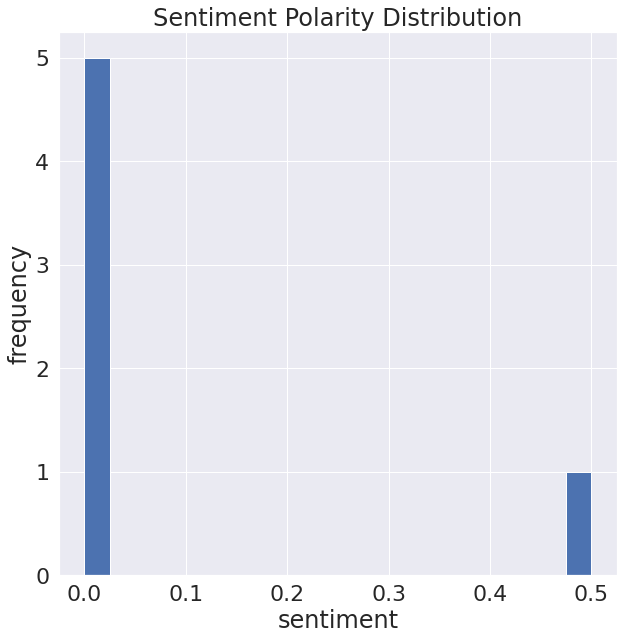

Similarity Score for 0-th trend :
('headsetstocks', 0.39915528893470764)
('provoke', 0.3787277340888977)
('posing', 0.3766016364097595)
('organic', 0.36921608448028564)
('woos', 0.3654153645038605)
('door', 0.35669443011283875)
('protect', 0.3554105758666992)
('burnley', 0.3426719307899475)
('pinterest', 0.3377099335193634)
('thesis', 0.33727896213531494)
Dissimilarity Score for 0-th trend : say
similarity/Dissimilarity with ['stockmarket', 'bottom', 'pros', 'say', 'sp', 'tests'] not found against model 1
similarity/Dissimilarity with ['stockmarket', 'bottom', 'pros', 'say', 'sp', 'tests'] not found against model 2


In [192]:
text="Is the stock-market bottom in? What the pros say after S&P 500 tests 4,000."
check_sentiment(text)

high -ve sentiment with some +ve shift ( Dissimilarity Score for 0-th trend : say ) despite of news being overall neutral to +ve , market participants are not showing confidence on the news or overall market situation 

Tokenized text : [['wall', 'street', 'closes', 'higher', 'boosted', 'strong', 'tesla', 'earnings']]


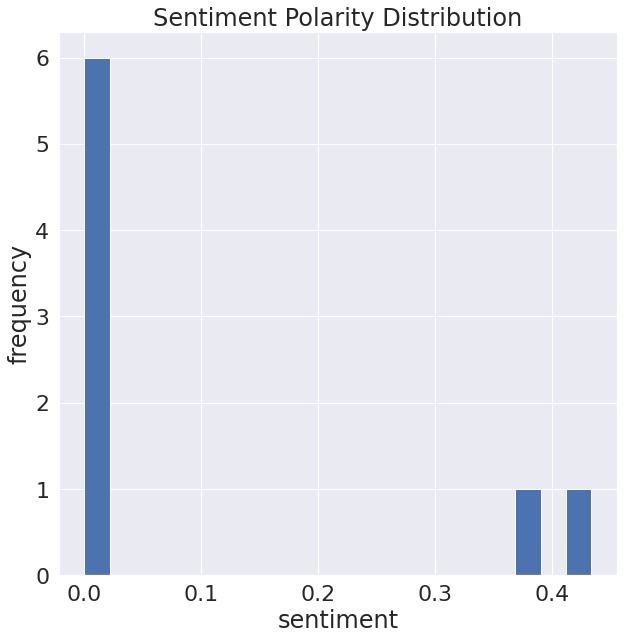

Similarity Score for 0-th trend :
('owner', 0.3952910900115967)
('recipe', 0.3883722722530365)
('financial', 0.35103699564933777)
('sohna', 0.33631041646003723)
('gumtree', 0.33067503571510315)
('reward', 0.3246820569038391)
('alot', 0.32453539967536926)
('regains', 0.324158638715744)
('bancorp', 0.3237854838371277)
('xoa', 0.32108309864997864)
Dissimilarity Score for 0-th trend : boosted
Similarity Score for 1-th trend :
('youtube', 0.38820961117744446)
('rules', 0.36936721205711365)
('american', 0.36555352807044983)
('airbase', 0.361858069896698)
('arcam', 0.352374404668808)
('homegrown', 0.3419117033481598)
('demonstration', 0.33979782462120056)
('marc', 0.3385811448097229)
('diamondback', 0.33774828910827637)
('hawaiian', 0.3364017605781555)
Dissimilarity Score for 1-th trend : closes
similarity/Dissimilarity with ['wall', 'street', 'closes', 'higher', 'boosted', 'strong', 'tesla', 'earnings'] not found against model 2


In [193]:
text="Wall Street closes higher boosted by strong Tesla earnings"
check_sentiment(text)

we can see both -ve sentiment (model-0) & +ve sentiment (model-1) based on similarity score<br>
we can see slight +ve sentiment in between -ve trends ( Dissimilarity Score for 0-th trend : boosted )<br>
we see slight -ve sentiment in between +ve trends (Dissimilarity Score for 1-th trend : closes)<br>

Here we can see market participants are buying the news i.e they're agreeing with the news and showing +ve sentiment

Tokenized text : [['weekend', 'reads', 'prepare', 'big', 'week', 'crucial', 'federal', 'reserve', 'decision', 'techcompany', 'earnings', 'gdp', 'report']]


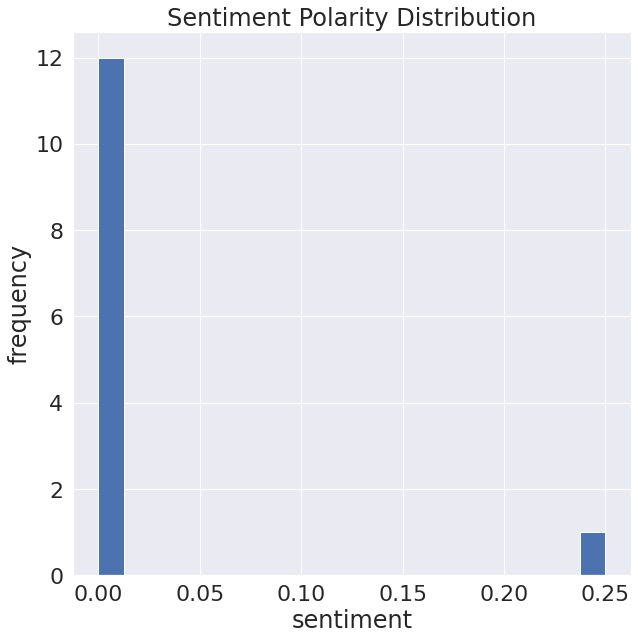

similarity/Dissimilarity with ['weekend', 'reads', 'prepare', 'big', 'week', 'crucial', 'federal', 'reserve', 'decision', 'techcompany', 'earnings', 'gdp', 'report'] not found against model 0
similarity/Dissimilarity with ['weekend', 'reads', 'prepare', 'big', 'week', 'crucial', 'federal', 'reserve', 'decision', 'techcompany', 'earnings', 'gdp', 'report'] not found against model 1
similarity/Dissimilarity with ['weekend', 'reads', 'prepare', 'big', 'week', 'crucial', 'federal', 'reserve', 'decision', 'techcompany', 'earnings', 'gdp', 'report'] not found against model 2


In [194]:
text="Weekend reads: Prepare for a big week — a crucial Federal Reserve decision, tech-company earnings and a gdp report"
check_sentiment(text)

no similarity or dissimilary found

Tokenized text : [['apple', 'pay', 'million', 'settlement', 'butterfly', 'keyboard', 'lawsuit']]


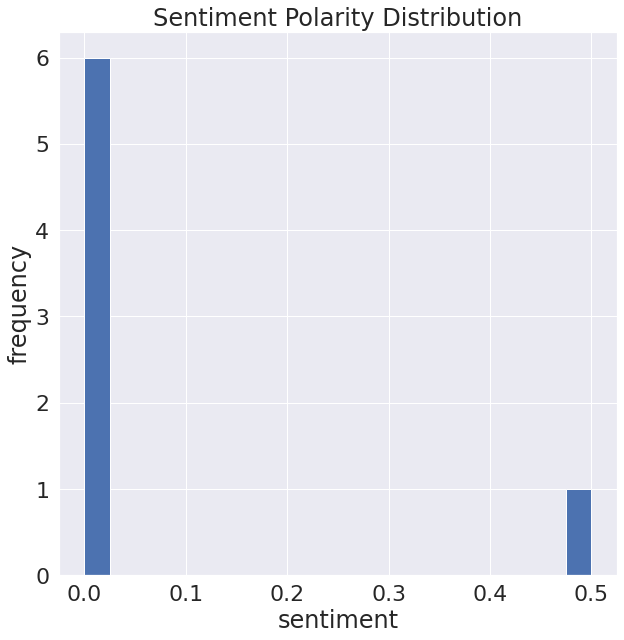

similarity/Dissimilarity with ['apple', 'pay', 'million', 'settlement', 'butterfly', 'keyboard', 'lawsuit'] not found against model 0
similarity/Dissimilarity with ['apple', 'pay', 'million', 'settlement', 'butterfly', 'keyboard', 'lawsuit'] not found against model 1
similarity/Dissimilarity with ['apple', 'pay', 'million', 'settlement', 'butterfly', 'keyboard', 'lawsuit'] not found against model 2


In [195]:
text="Apple to Pay $50 Million Settlement Over Butterfly Keyboard Lawsuit "
check_sentiment(text)

it seems strange either no one cares about the news or people doesn't care about it , while the news is a bad hit for apple , it's a good news for owner of butterfly keyboard owner (that might be the case TextBlob is showing +ve sentiment polarity)

Tokenized text : [['ibm', 'apple', 'jnj', 'tuesdays', 'stock', 'market', 'movers']]


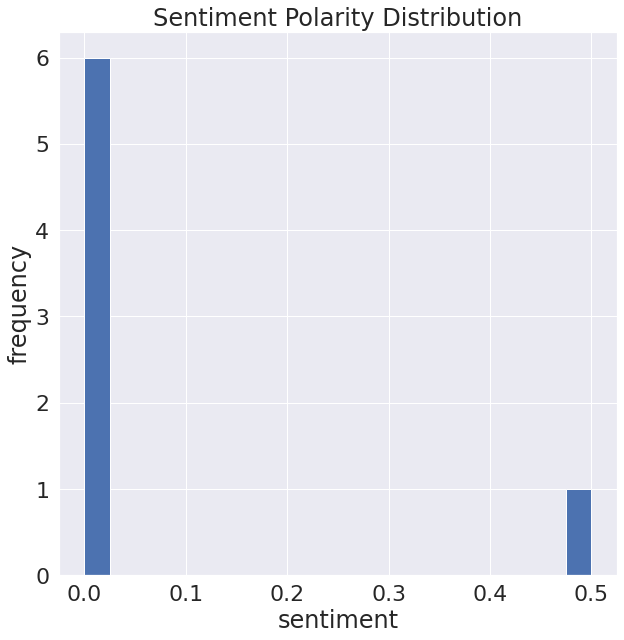

similarity/Dissimilarity with ['ibm', 'apple', 'jnj', 'tuesdays', 'stock', 'market', 'movers'] not found against model 0
similarity/Dissimilarity with ['ibm', 'apple', 'jnj', 'tuesdays', 'stock', 'market', 'movers'] not found against model 1
similarity/Dissimilarity with ['ibm', 'apple', 'jnj', 'tuesdays', 'stock', 'market', 'movers'] not found against model 2


In [196]:
text="IBM, Apple, JNJ, and More of Tuesday's Stock Market Movers"
check_sentiment(text)

Possibly same situation as above

We can see the accuracy is not too great , perhaps BERT may produce better result but that is resource intensive too